### Assignment1

Remember -> submission using itslearning, both notebook and github repo *deadline on 22.11.2021*

#### Task 1 (3 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 15}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 10.0

In [2]:
import zipfile

data_zip = zipfile.ZipFile('superconduct.zip', 'r')
data_zip.extract('train.csv')
df = pd.read_csv('train.csv')

In [3]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
df.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

In [5]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [6]:
#null values check

df.isnull().values.any()

False

In [7]:
#extracting features and label

X = df.iloc[:,:81].values
y = df['critical_temp'].values

In [8]:
#train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Regression with default parameters

In [9]:
#ridge

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

Training set score: 0.739
Test set score: 0.727


In [10]:
#Lasso

from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.718
Test set score: 0.705
Number of features used: 46


#### Regression with different parameters

#### Ridge

In [11]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge001.score(X_test, y_test)))

Training set score: 0.740
Test set score: 0.728


In [12]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.740
Test set score: 0.728


In [13]:
ridge4 = Ridge(alpha=4).fit(X_train, y_train)
print("Training set score: {:.3f}".format(ridge4.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge4.score(X_test, y_test)))

Training set score: 0.739
Test set score: 0.727


In [14]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.738
Test set score: 0.726


In [15]:
ridge50 = Ridge(alpha=50).fit(X_train, y_train)
print("Training set score: {:.3f}".format(ridge50.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge50.score(X_test, y_test)))

Training set score: 0.734
Test set score: 0.723


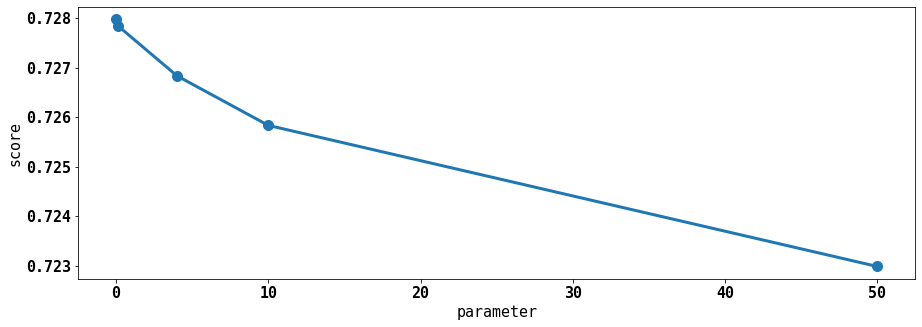

In [16]:
parameter = np.array([0.01, 0.1, 4, 10, 50])
score = np.array([ridge001.score(X_test, y_test), 
                  ridge01.score(X_test, y_test), 
                  ridge4.score(X_test, y_test),
                  ridge10.score(X_test, y_test),
                  ridge50.score(X_test, y_test)])
plt.xlabel("parameter")
plt.ylabel("score")
plt.plot(parameter, score, linestyle = '-', marker = 'o')
plt.show()

#### Lasso

In [17]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.738
Test set score: 0.727
Number of features used: 74


In [18]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))

Training set score: 0.729
Test set score: 0.717
Number of features used: 62


In [19]:
lasso4 = Lasso(alpha=4, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lasso4.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso4.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso4.coef_ != 0)))

Training set score: 0.697
Test set score: 0.685
Number of features used: 34


In [20]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lasso10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso10.coef_ != 0)))

Training set score: 0.674
Test set score: 0.662
Number of features used: 29


In [21]:
lasso50 = Lasso(alpha=50, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.718
Test set score: 0.705
Number of features used: 46


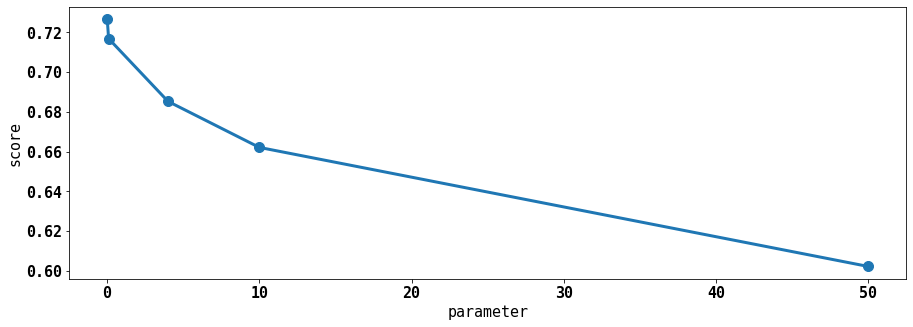

In [22]:
score = np.array([lasso001.score(X_test, y_test), 
                  lasso01.score(X_test, y_test), 
                  lasso4.score(X_test, y_test),
                  lasso10.score(X_test, y_test),
                  lasso50.score(X_test, y_test)])
plt.xlabel("parameter")
plt.ylabel("score")
plt.plot(parameter, score, linestyle = '-', marker = 'o')
plt.show()

In [23]:
def plot_ridge():
    plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
    plt.plot(ridge01.coef_, '^', label="Ridge alpha=0.1")
    plt.plot(ridge001.coef_, 'v', label="Ridge alpha=0.01")
    plt.plot(ridge4.coef_, '*', label="Ridge alpha=4")
    plt.plot(ridge10.coef_, 'X', label="Ridge alpha=10")
    plt.plot(ridge50.coef_, 'P', label="Ridge alpha=50")
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-150, 150)
    plt.legend(fontsize='x-small')

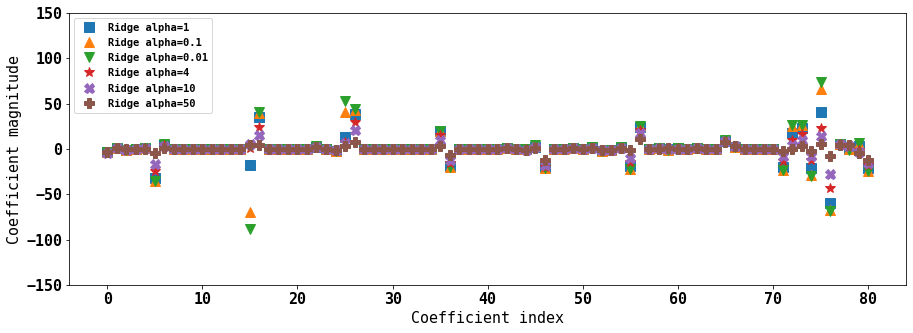

In [24]:
plot_ridge()

#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

In [25]:
df_cc = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls')

In [26]:
df_cc.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [27]:
df_cc = df_cc.drop('Unnamed: 0', 1)


<ipython-input-27-5e16c13cb541>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_cc = df_cc.drop('Unnamed: 0', 1)


In [28]:
df_cc.columns = df_cc.iloc[0]

In [29]:
df_cc.drop(df_cc.index[0], inplace =True)

In [30]:
df_cc.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [31]:
df_cc.dtypes

0
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [32]:
#convert datatypes

df_cc = df_cc.astype(str).astype(float)
df_cc.dtypes

0
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month    float64
dtype: object

In [33]:
df_cc.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [34]:
#null values check

df_cc.isnull().values.any()

False

In [35]:
#check if there are only two values in the potential label for binary classification

df_cc['default payment next month'].unique()

array([1., 0.])

In [36]:
#extracting features and label

X = df_cc.iloc[:,:23].values
y = df_cc['default payment next month'].values

#train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Regression with default parameters

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.777
Test set score: 0.783


In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.729


#### Regression with different parameters

#### Logistic Regression

In [39]:
logreg001 = LogisticRegression(C=0.01, max_iter=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.777
Test set score: 0.783


In [40]:
logreg01 = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test, y_test)))

Training set score: 0.777
Test set score: 0.783


In [41]:
logreg10 = LogisticRegression(C=10, max_iter=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test, y_test)))

Training set score: 0.777
Test set score: 0.783


In [42]:
logreg100 = LogisticRegression(C=100, max_iter=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test, y_test)))

Training set score: 0.777
Test set score: 0.783


In [43]:
logreg1000 = LogisticRegression(C=1000, max_iter=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test, y_test)))

Training set score: 0.777
Test set score: 0.783


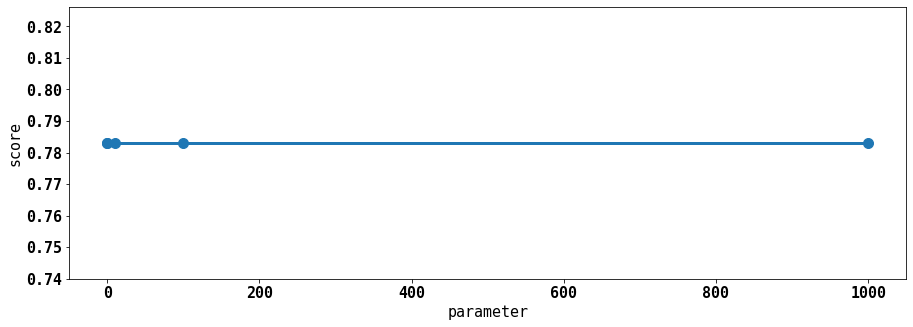

In [44]:
parameter = np.array([0.01, 0.1, 10, 100, 1000])
score = np.array([logreg001.score(X_test, y_test), 
                  logreg01.score(X_test, y_test), 
                  logreg10.score(X_test, y_test),
                  logreg100.score(X_test, y_test),
                  logreg1000.score(X_test, y_test)])
plt.xlabel("parameter")
plt.ylabel("score")
plt.plot(parameter, score, linestyle = '-', marker = 'o')
plt.show()

#### Decision Tree Classifier

In [45]:
tree4 = DecisionTreeClassifier(min_samples_split=4).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree4.score(X_test, y_test)))

Accuracy on training set: 0.980
Accuracy on test set: 0.737


In [46]:
tree8 = DecisionTreeClassifier(min_samples_split=8).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree8.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree8.score(X_test, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.739


In [47]:
tree12 = DecisionTreeClassifier(min_samples_split=12).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree12.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree12.score(X_test, y_test)))

Accuracy on training set: 0.929
Accuracy on test set: 0.748


In [48]:
tree50 = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree50.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree50.score(X_test, y_test)))

Accuracy on training set: 0.862
Accuracy on test set: 0.787


In [49]:
tree80 = DecisionTreeClassifier(min_samples_split=80).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree80.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree80.score(X_test, y_test)))

Accuracy on training set: 0.851
Accuracy on test set: 0.800


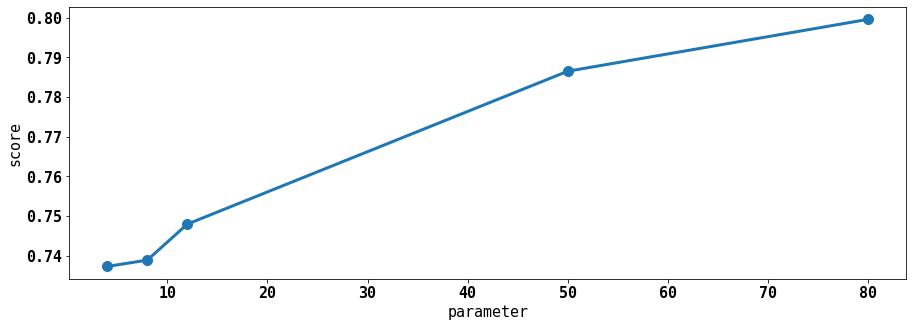

In [50]:
parameter = np.array([4, 8, 12, 50, 80])
score = np.array([tree4.score(X_test, y_test), 
                  tree8.score(X_test, y_test), 
                  tree12.score(X_test, y_test),
                  tree50.score(X_test, y_test),
                  tree80.score(X_test, y_test)])
plt.xlabel("parameter")
plt.ylabel("score")
plt.plot(parameter, score, linestyle = '-', marker = 'o')
plt.show()

In [51]:
def plot_tree():
    plt.plot(tree.feature_importances_, 'P', label="Min sample split=2")
    plt.plot(tree4.feature_importances_, 's', label="Min sample split=4")
    plt.plot(tree8.feature_importances_, '^', label="Min sample split=8")
    plt.plot(tree12.feature_importances_, 'v', label="Min sample split=12")
    plt.plot(tree50.feature_importances_, '*', label="Min sample split=50")
    plt.plot(tree80.feature_importances_, 'X', label="Min sample split=80")
    plt.xlabel("Feature importance index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-0.50, 0.50)
    plt.legend(fontsize='x-small')

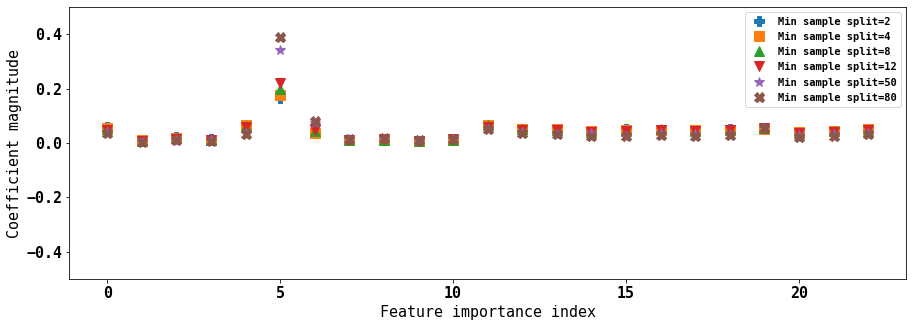

In [52]:
plot_tree()

In [53]:
names = list(df_cc.columns)
X_names = names[:23]
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_names, fontsize=10)
    plt.title('Feature importance for default of credit card clients')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

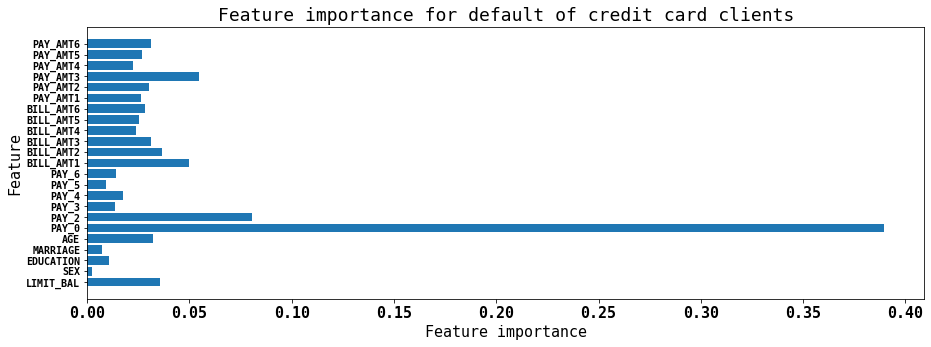

In [54]:
plot_feature_importances(tree80)

#### Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

In [55]:
#import data with column names

col = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive',
       'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroine',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data', names = col)
data.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


In [56]:
data.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroine       object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [57]:
data.isnull().values.any()

False

In [74]:
data_new = data.copy()

In [75]:
#define features

X = data_new.iloc[:,1:13].values



In [79]:
#create new classes for two selected labels

data_new.loc[(data_new['Alcohol'] == 'CL0') | 
             (data_new['Alcohol'] == 'CL1') | 
             (data_new['Alcohol'] == 'CL2'),'New_Alcohol'] = 0

data_new.loc[(data_new['Alcohol'] == 'CL3') | 
             (data_new['Alcohol'] == 'CL4'),'New_Alcohol']  = 1

data_new.loc[(data_new['Alcohol'] == 'CL5') | 
             (data_new['Alcohol'] == 'CL6'),'New_Alcohol']  = 3  

data_new.loc[(data_new['Amphet'] == 'CL0') | 
             (data_new['Amphet'] == 'CL1') | 
             (data_new['Amphet'] == 'CL2'),'New_Amphet'] = 0

data_new.loc[(data_new['Amphet'] == 'CL3') | 
             (data_new['Amphet'] == 'CL4'),'New_Amphet']  = 1

data_new.loc[(data_new['Amphet'] == 'CL5') | 
             (data_new['Amphet'] == 'CL6'),'New_Amphet']  = 3 
                                             

In [88]:
data_new.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,New_Alcohol,New_Amphet
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,3.0,0.0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,3.0,0.0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,3.0,0.0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1.0,0.0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,1.0,0.0


In [82]:
#define labels

y_alc = data_new.New_Alcohol
y_amp = data_new.New_Amphet

#### Classification with default parameters

In [93]:
from sklearn.ensemble import RandomForestClassifier

#target is Alcohol

X_train, X_test, y_train, y_test = train_test_split(X,y_alc, random_state=42)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.646


In [94]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.784
Accuracy on test set: 0.644


In [95]:
#target is Amphet

X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.771


In [96]:
gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.871
Accuracy on test set: 0.754


#### Classification with optimized parameters

In [128]:
#target is Alcohol

X_train, X_test, y_train, y_test = train_test_split(X,y_alc, random_state=42)
forest4 = RandomForestClassifier(min_samples_split=4)
forest4.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest4.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.631


In [129]:
forest5 = RandomForestClassifier(min_samples_split=5)
forest5.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest5.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest5.score(X_test, y_test)))

Accuracy on training set: 0.971
Accuracy on test set: 0.646


In [130]:
forest7 = RandomForestClassifier(min_samples_split=7)
forest7.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest7.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest7.score(X_test, y_test)))

Accuracy on training set: 0.927
Accuracy on test set: 0.657


In [131]:
forest10 = RandomForestClassifier(min_samples_split=10)
forest10.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest10.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest10.score(X_test, y_test)))

Accuracy on training set: 0.869
Accuracy on test set: 0.657


In [132]:
forest15 = RandomForestClassifier(min_samples_split=15)
forest15.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest15.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest15.score(X_test, y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.648


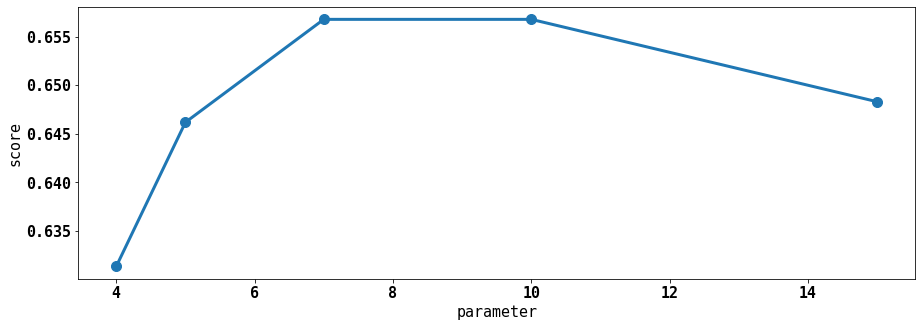

In [133]:
parameter = np.array([4, 5, 7, 10, 15])
score = np.array([forest4.score(X_test, y_test), 
                  forest5.score(X_test, y_test), 
                  forest7.score(X_test, y_test),
                  forest10.score(X_test, y_test),
                  forest15.score(X_test, y_test)])
plt.xlabel("parameter")
plt.ylabel("score")
plt.plot(parameter, score, linestyle = '-', marker = 'o')
plt.show()

In [142]:
#target is Amphet

X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest4 = RandomForestClassifier(min_samples_split=4)
forest4.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest4.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.769


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest5 = RandomForestClassifier(min_samples_split=5)
forest5.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest5.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest5.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.763


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest7 = RandomForestClassifier(min_samples_split=7)
forest7.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest7.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest7.score(X_test, y_test)))

Accuracy on training set: 0.953
Accuracy on test set: 0.769


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest10 = RandomForestClassifier(min_samples_split=10)
forest10.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest10.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest10.score(X_test, y_test)))

Accuracy on training set: 0.910
Accuracy on test set: 0.771


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest15 = RandomForestClassifier(min_samples_split=15)
forest15.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest15.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest15.score(X_test, y_test)))

Accuracy on training set: 0.863
Accuracy on test set: 0.769


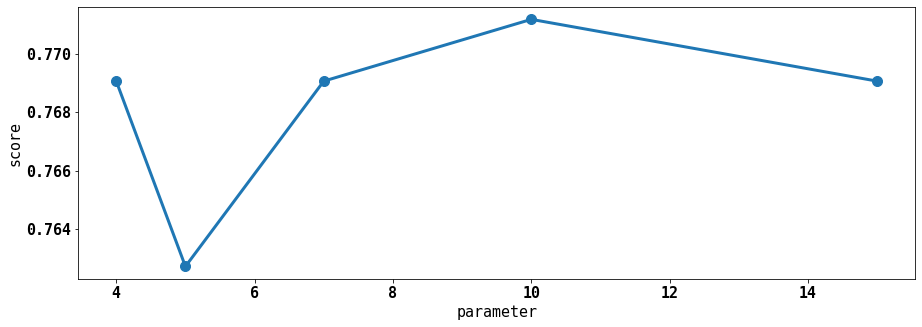

In [147]:
parameter = np.array([4, 5, 7, 10, 15])
score = np.array([forest4.score(X_test, y_test), 
                  forest5.score(X_test, y_test), 
                  forest7.score(X_test, y_test),
                  forest10.score(X_test, y_test),
                  forest15.score(X_test, y_test)])
plt.xlabel("parameter")
plt.ylabel("score")
plt.plot(parameter, score, linestyle = '-', marker = 'o')
plt.show()